In [1]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv("gdrive/MyDrive/ImageClassificationCode/Light_GBM/dataset.csv", sep = ";", encoding = "latin-1")
data

,ID_Imatge,ID_Pacient,Ull,Retinopatia,Edat,Sexe,Valor_lbb127,Valor_lbb030,Valor_lbb144,Valor_lbb124,Valor_ek201,Valor_ek202,Valor_vk405
0,3gfse4v66swpi5v1_610213783582_od_nasal_2106071...,"7,80E+21",D,1,70,H,"6,4",148,"76,4",49,115,83,NaN
1,3gfse4v66swpi57n_610213783582_od_central_21060...,"7,80E+21",D,1,70,H,"6,4",148,"76,4",49,115,83,NaN
2,3gfse4v66swpi84f_610213783582_os_central_21060...,"7,80E+21",E,1,70,H,"6,4",148,"76,4",49,115,83,NaN
3,3gfse4v66swpi8n0_610213783582_os_nasal_2106071...,"7,80E+21",E,1,70,H,"6,4",148,"76,4",49,115,83,NaN
4,3gfse4v66um1ynfa_610214136696_od_central_21072...,"7,70E+19",D,1,55,H,NaN,NaN,NaN,NaN,110,72,"3,54"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82268,0ngpp8436fadf4sl_68441550467_od_central_201005...,"6,80E+21",D,1,82,D,"7,9",231,100,55,140,70,NaN
82269,0ngpp8436am0k3qd_68441514549_os_central_200303...,"6,40E+21",E,1,73,H,"7,7",232,154,60,139,67,"6,81"
82270,0ngpp8436am0k2o6_68441514549_od_central_200303...,"6,40E+21",D,1,73,H,"7,7",232,154,60,139,67,"6,81"
82271,0ngpp8436letmszd_68441570330_od_central_201130...,"8,50E+21",D,1,65,H,"7,5",211,122,58,NaN,NaN,NaN


In [4]:
data.columns = ["ID_Image", "ID_Pacient", "Eye", "Retinopathy", "Age", "Sex", "HbA1c", "Total Cholesterol", "LDL", "HDL", "Systolic Arterial Pressure", "Diastolic Arterial Pressure", "Cardiovascular Risk Score"]

In [5]:
data.columns

Index(['ID_Image', 'ID_Pacient', 'Eye', 'Retinopathy', 'Age', 'Sex', 'HbA1c',
       'Total Cholesterol', 'LDL', 'HDL', 'Systolic Arterial Pressure',
       'Diastolic Arterial Pressure', 'Cardiovascular Risk Score'],
      dtype='object')

In [6]:
data.head(5)

,ID_Image,ID_Pacient,Eye,Retinopathy,Age,Sex,HbA1c,Total Cholesterol,LDL,HDL,Systolic Arterial Pressure,Diastolic Arterial Pressure,Cardiovascular Risk Score
0,3gfse4v66swpi5v1_610213783582_od_nasal_2106071...,"7,80E+21",D,1,70,H,"6,4",148,"76,4",49,115,83,NaN
1,3gfse4v66swpi57n_610213783582_od_central_21060...,"7,80E+21",D,1,70,H,"6,4",148,"76,4",49,115,83,NaN
2,3gfse4v66swpi84f_610213783582_os_central_21060...,"7,80E+21",E,1,70,H,"6,4",148,"76,4",49,115,83,NaN
3,3gfse4v66swpi8n0_610213783582_os_nasal_2106071...,"7,80E+21",E,1,70,H,"6,4",148,"76,4",49,115,83,NaN
4,3gfse4v66um1ynfa_610214136696_od_central_21072...,"7,70E+19",D,1,55,H,NaN,NaN,NaN,NaN,110,72,"3,54"


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82273 entries, 0 to 82272
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID_Image                     82273 non-null  object
 1   ID_Pacient                   82273 non-null  object
 2   Eye                          82273 non-null  object
 3   Retinopathy                  82273 non-null  int64 
 4   Age                          82273 non-null  int64 
 5   Sex                          82273 non-null  object
 6   HbA1c                        72547 non-null  object
 7   Total Cholesterol            73619 non-null  object
 8   LDL                          61223 non-null  object
 9   HDL                          70055 non-null  object
 10  Systolic Arterial Pressure   71982 non-null  object
 11  Diastolic Arterial Pressure  71995 non-null  object
 12  Cardiovascular Risk Score    34490 non-null  object
dtypes: int64(2), object(11)
memory 

In [8]:
data.isnull().sum()

ID_Image                           0
ID_Pacient                         0
Eye                                0
Retinopathy                        0
Age                                0
Sex                                0
HbA1c                           9726
Total Cholesterol               8654
LDL                            21050
HDL                            12218
Systolic Arterial Pressure     10291
Diastolic Arterial Pressure    10278
Cardiovascular Risk Score      47783
dtype: int64

In [9]:
round(data.isnull().sum()/len(data)*100, 2)

ID_Image                        0.00
ID_Pacient                      0.00
Eye                             0.00
Retinopathy                     0.00
Age                             0.00
Sex                             0.00
HbA1c                          11.82
Total Cholesterol              10.52
LDL                            25.59
HDL                            14.85
Systolic Arterial Pressure     12.51
Diastolic Arterial Pressure    12.49
Cardiovascular Risk Score      58.08
dtype: float64

In [10]:
data.drop("Cardiovascular Risk Score", axis = 1, inplace = True)
data.drop("ID_Pacient", axis = 1, inplace = True)

**1. TARGET VARIABLE TO STR**

In [11]:
data["Retinopathy"] = data["Retinopathy"].astype(str)

**2. FROM STR TO FLOAT64**

1. HbA1c

In [12]:
data["HbA1c"].unique()

array(['6,4', nan, '6,1', '8,2', '7,7', '5,6', '6,3', '9,9', '8,5', '10',
       '10,6', '5,4', '5,5', '13,6', '5,9', '6,5', '7,3', '6,2',
       "*No procedeix, L'interval de temps transcorregut entre una determinació idèntica anterior és inferior a 70 dies",
       '7', '8,7', '6,8', '7,2', '7,6', '5,3', '11', '6,7', '7,4', '6,6',
       '8,3', '5,8', '7,5', '12,8', '5,7', '7,1', '8,4', '8,1', '6,9',
       '12,5', '12,7', '9,5', '7,9', '9,8', '6', '8,8', '8', '9,3', '8,9',
       '9,6', '5,1', '9,1', '10,2', '10,5', '9', '8,6', '10,3', '5',
       '5,2', '12', '9,7', '4,9', '*', '7,8', '9,2', '9,4', '11,2',
       '11,8', '11,6', '10,8', '10,7', '10,1', '15,3', '10,4', '11,1',
       '17,4', '11,5', '13,9', '11,3', '11,4', '13,5', '12,3', '12,4',
       '15,9', '14,5', '14,1', '12,1', '14,3', '14,4', '12,2', '12,6',
       '13,1', '11,7', '13,4', '10,9', '16,8', '15,5', "5'9", '16,2',
       '14,6', '13', 'Veure comentari resultat', '11,9', '4,7', '12,9',
       '7,39', "Manca mostr

In [13]:
data["HbA1c"] = data["HbA1c"].apply(lambda x: str(x).replace(",", "."))
data["HbA1c"] = data["HbA1c"].apply(lambda x: x if x in re.findall(r'\d+[.]?\d+', x) else np.nan)
data["HbA1c"] = data["HbA1c"].astype(float)

In [14]:
data["HbA1c"].unique()

array([ 6.4 ,   nan,  6.1 ,  8.2 ,  7.7 ,  5.6 ,  6.3 ,  9.9 ,  8.5 ,
       10.  , 10.6 ,  5.4 ,  5.5 , 13.6 ,  5.9 ,  6.5 ,  7.3 ,  6.2 ,
        8.7 ,  6.8 ,  7.2 ,  7.6 ,  5.3 , 11.  ,  6.7 ,  7.4 ,  6.6 ,
        8.3 ,  5.8 ,  7.5 , 12.8 ,  5.7 ,  7.1 ,  8.4 ,  8.1 ,  6.9 ,
       12.5 , 12.7 ,  9.5 ,  7.9 ,  9.8 ,  8.8 ,  9.3 ,  8.9 ,  9.6 ,
        5.1 ,  9.1 , 10.2 , 10.5 ,  8.6 , 10.3 ,  5.2 , 12.  ,  9.7 ,
        4.9 ,  7.8 ,  9.2 ,  9.4 , 11.2 , 11.8 , 11.6 , 10.8 , 10.7 ,
       10.1 , 15.3 , 10.4 , 11.1 , 17.4 , 11.5 , 13.9 , 11.3 , 11.4 ,
       13.5 , 12.3 , 12.4 , 15.9 , 14.5 , 14.1 , 12.1 , 14.3 , 14.4 ,
       12.2 , 12.6 , 13.1 , 11.7 , 13.4 , 10.9 , 16.8 , 15.5 , 16.2 ,
       14.6 , 13.  , 11.9 ,  4.7 , 12.9 ,  7.39, 17.  , 13.3 , 16.3 ,
       13.7 , 13.8 , 13.2 ,  4.8 , 14.  ,  4.6 , 14.9 ,  5.35,  6.69,
       14.8 , 15.6 ,  6.39, 14.2 ,  4.2 , 16.7 ])

2. Total Cholesterol

In [15]:
data["Total Cholesterol"].unique()

array(['148', nan, '149', ..., '344', '141,26', '322'], dtype=object)

In [16]:
data["Total Cholesterol"] = data["Total Cholesterol"].apply(lambda x: str(x).replace(",", "."))
data["Total Cholesterol"] = data["Total Cholesterol"].apply(lambda x: x if x in re.findall(r'\d+[.]?\d+', x) else np.nan)
data["Total Cholesterol"] = data["Total Cholesterol"].astype(float)

In [17]:
data["Total Cholesterol"].unique()

array([148.  ,    nan, 149.  , ..., 344.  , 141.26, 322.  ])

3. LDL and HDL

In [18]:
data["LDL"].unique()

array(['76,4', nan, '87,8', ..., '16', '230', '224'], dtype=object)

In [19]:
data["LDL"] = data["LDL"].apply(lambda x: str(x).replace(",", "."))
data["LDL"] = data["LDL"].apply(lambda x: x if x in re.findall(r'\d+[.]?\d+', x) else np.nan)
data["LDL"] = data["LDL"].astype(float)

In [20]:
data["LDL"].unique()

array([ 76.4,   nan,  87.8, ...,  16. , 230. , 224. ])

In [21]:
data["HDL"] = data["HDL"].apply(lambda x: str(x).replace(",", "."))
data["HDL"] = data["HDL"].apply(lambda x: x if x in re.findall(r'\d+[.]?\d+', x) else np.nan)
data["HDL"] = data["HDL"].astype(float)

In [22]:
data["HDL"].unique()

array([49.  ,   nan, 46.  , ..., 56.36, 66.95, 46.83])

4. Systolic and Diastolic Blood Pressure



In [23]:
data["Systolic Arterial Pressure"].unique()

array(['115', '110', '102', '128', '140', nan, '112', '149', '97', '133',
       '121', '138', '129', '135', '126', '163', '131', '118', '134',
       '151', '125', '167', '154', '132', '119', '152', '147', '130',
       '139', '123', '109', '120', '117', '166', '137', '124', '127',
       '96', '160', '101', '155', '136', '153', '174', '116', '148',
       '157', '143', '145', '185', '108', '170', '142', '175', '122',
       '186', '144', '114', '111', '146', '150', '113', '179', '176',
       '168', '169', '141', '131,8', '100', '107', '162', '164', '183',
       '105', '158', '106', '159', '99', '104', '93', '171', '165', '161',
       '103', '156', '181', '178', '192', '85', '98', '177', '90', '208',
       '190', '182', '173', '180', '193', '203', '184', '188', '172',
       '197', '135,5', '91', '196', '92', '80', '133,4', '131,6', '82',
       '145,4', '133,3', '195', '200', '187', '94', '86', '95', '1', '13',
       '88', '209', '212', '14', '20', '132,2', '38', '89', '11', '20

In [24]:
data["Diastolic Arterial Pressure"].unique()

array(['83', '72', '81', '86', '94', nan, '60', '75', '84', '63', '51',
       '89', '100', '88', '90', '69', '74', '96', '78', '68', '87', '73',
       '61', '65', '82', '67', '62', '59', '77', '71', '70', '79', '76',
       '85', '97', '80', '109', '91', '57', '92', '115', '110', '95',
       '64', '108', '101', '66', '104', '105', '98', '72,7', '93', '54',
       '119', '55', '99', '50', '102', '106', '56', '47', '53', '52',
       '58', '103', '171', '112', '116', '122', '107', '40', '49', '111',
       '42', '134', '79,4', '76,3', '140', '71,3', '78,1', '72,2', '72,5',
       '41', '48', '46', '35', '137', '114', '7', '74,5', '10', '67,5',
       '45', '28', '113', '38', '35,8', '85,5', '43', '128', '83,5',
       '78,5', '44', '173', '87,5', '117', '124', '6', '76,5', '78,01',
       '6,5', '36,3', '80,05', '130', '76,01', '36', '138', '120', '36,4',
       '127', '164'], dtype=object)

In [25]:
data["Systolic Arterial Pressure"] = data["Systolic Arterial Pressure"].apply(lambda x: str(x).replace(",", "."))
data["Systolic Arterial Pressure"] = data["Systolic Arterial Pressure"].apply(lambda x: x if x in re.findall(r'\d+[.]?\d+', x) else np.nan)
data["Systolic Arterial Pressure"] = data["Systolic Arterial Pressure"].astype(float)

In [26]:
data["Diastolic Arterial Pressure"] = data["Diastolic Arterial Pressure"].apply(lambda x: str(x).replace(",", "."))
data["Diastolic Arterial Pressure"] = data["Diastolic Arterial Pressure"].apply(lambda x: x if x in re.findall(r'\d+[.]?\d+', x) else np.nan)
data["Diastolic Arterial Pressure"] = data["Diastolic Arterial Pressure"].astype(float)

In [27]:
data["Systolic Arterial Pressure"].unique()

array([115.  , 110.  , 102.  , 128.  , 140.  ,    nan, 112.  , 149.  ,
        97.  , 133.  , 121.  , 138.  , 129.  , 135.  , 126.  , 163.  ,
       131.  , 118.  , 134.  , 151.  , 125.  , 167.  , 154.  , 132.  ,
       119.  , 152.  , 147.  , 130.  , 139.  , 123.  , 109.  , 120.  ,
       117.  , 166.  , 137.  , 124.  , 127.  ,  96.  , 160.  , 101.  ,
       155.  , 136.  , 153.  , 174.  , 116.  , 148.  , 157.  , 143.  ,
       145.  , 185.  , 108.  , 170.  , 142.  , 175.  , 122.  , 186.  ,
       144.  , 114.  , 111.  , 146.  , 150.  , 113.  , 179.  , 176.  ,
       168.  , 169.  , 141.  , 131.8 , 100.  , 107.  , 162.  , 164.  ,
       183.  , 105.  , 158.  , 106.  , 159.  ,  99.  , 104.  ,  93.  ,
       171.  , 165.  , 161.  , 103.  , 156.  , 181.  , 178.  , 192.  ,
        85.  ,  98.  , 177.  ,  90.  , 208.  , 190.  , 182.  , 173.  ,
       180.  , 193.  , 203.  , 184.  , 188.  , 172.  , 197.  , 135.5 ,
        91.  , 196.  ,  92.  ,  80.  , 133.4 , 131.6 ,  82.  , 145.4 ,
      

In [28]:
data["Diastolic Arterial Pressure"].unique()

array([ 83.  ,  72.  ,  81.  ,  86.  ,  94.  ,    nan,  60.  ,  75.  ,
        84.  ,  63.  ,  51.  ,  89.  , 100.  ,  88.  ,  90.  ,  69.  ,
        74.  ,  96.  ,  78.  ,  68.  ,  87.  ,  73.  ,  61.  ,  65.  ,
        82.  ,  67.  ,  62.  ,  59.  ,  77.  ,  71.  ,  70.  ,  79.  ,
        76.  ,  85.  ,  97.  ,  80.  , 109.  ,  91.  ,  57.  ,  92.  ,
       115.  , 110.  ,  95.  ,  64.  , 108.  , 101.  ,  66.  , 104.  ,
       105.  ,  98.  ,  72.7 ,  93.  ,  54.  , 119.  ,  55.  ,  99.  ,
        50.  , 102.  , 106.  ,  56.  ,  47.  ,  53.  ,  52.  ,  58.  ,
       103.  , 171.  , 112.  , 116.  , 122.  , 107.  ,  40.  ,  49.  ,
       111.  ,  42.  , 134.  ,  79.4 ,  76.3 , 140.  ,  71.3 ,  78.1 ,
        72.2 ,  72.5 ,  41.  ,  48.  ,  46.  ,  35.  , 137.  , 114.  ,
        74.5 ,  10.  ,  67.5 ,  45.  ,  28.  , 113.  ,  38.  ,  35.8 ,
        85.5 ,  43.  , 128.  ,  83.5 ,  78.5 ,  44.  , 173.  ,  87.5 ,
       117.  , 124.  ,  76.5 ,  78.01,   6.5 ,  36.3 ,  80.05, 130.  ,
      

In [29]:
data["Age"] = data["Age"].astype(float)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82273 entries, 0 to 82272
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_Image                     82273 non-null  object 
 1   Eye                          82273 non-null  object 
 2   Retinopathy                  82273 non-null  object 
 3   Age                          82273 non-null  float64
 4   Sex                          82273 non-null  object 
 5   HbA1c                        65567 non-null  float64
 6   Total Cholesterol            73579 non-null  float64
 7   LDL                          60722 non-null  float64
 8   HDL                          70014 non-null  float64
 9   Systolic Arterial Pressure   71958 non-null  float64
 10  Diastolic Arterial Pressure  71989 non-null  float64
dtypes: float64(7), object(4)
memory usage: 6.9+ MB


**3. OUTLIER IDENTIFICATION**

In [51]:
def outliers_std(column):   
  data_mean, data_std = np.mean(data[column]), np.std(data[column])
  cut_off = data_std * 3
  lower, upper = data_mean - cut_off, data_mean + cut_off
  outliers = [x for x in data[column] if x < lower or x > upper]
  outliers_removed = [x for x in data[column] if x >= lower and x <= upper]
  return column, 'Identified outliers: %d' % len(outliers), 'Non-outlier observations: %d' % len(outliers_removed)

In [52]:
outliers = [outliers_std(i) for i in data.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]

In [53]:
outliers

[('Age', 'Identified outliers: 432', 'Non-outlier observations: 81841'),
 ('HbA1c', 'Identified outliers: 1160', 'Non-outlier observations: 64407'),
 ('Total Cholesterol',
  'Identified outliers: 484',
  'Non-outlier observations: 73095'),
 ('LDL', 'Identified outliers: 44', 'Non-outlier observations: 60678'),
 ('HDL', 'Identified outliers: 734', 'Non-outlier observations: 69280'),
 ('Systolic Arterial Pressure',
  'Identified outliers: 870',
  'Non-outlier observations: 71088'),
 ('Diastolic Arterial Pressure',
  'Identified outliers: 394',
  'Non-outlier observations: 71595')]

In [ ]:
# There are few outliers in the data.

**4. IMPUTATION OF OUTLIERS**

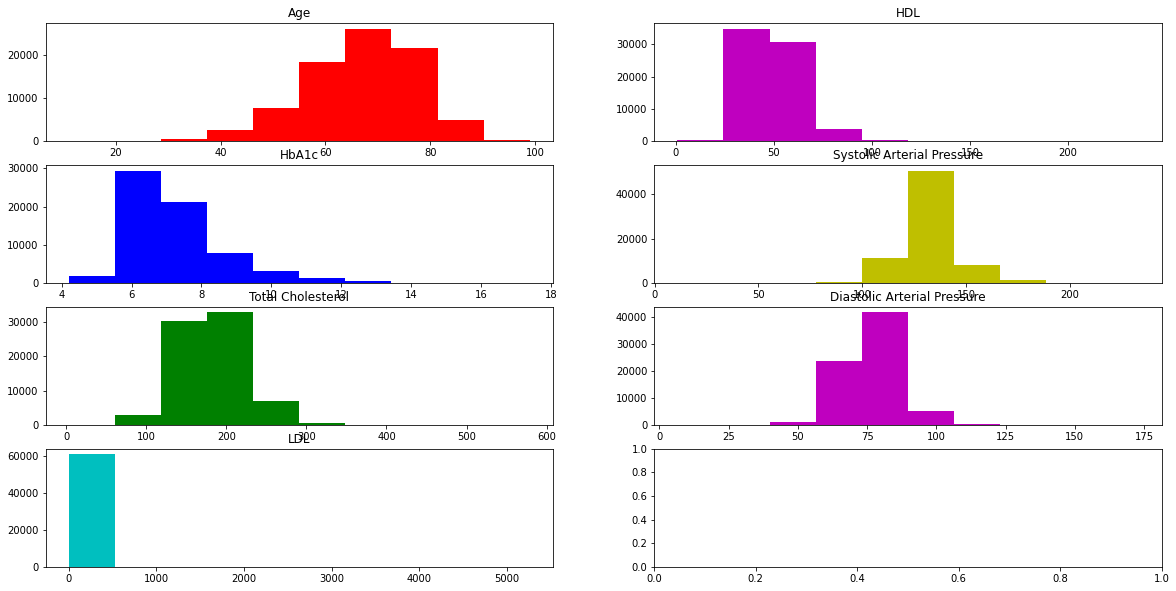

In [54]:
fig, ax = plt.subplots(4, 2, figsize=(20, 10))
ax[0, 0].hist(data["Age"], color =  "r")
ax[1, 0].hist(data["HbA1c"], color =  "b")
ax[2, 0].hist(data["Total Cholesterol"], color =  "g")
ax[3, 0].hist(data["LDL"], color =  "c")
ax[0, 1].hist(data["HDL"], color =  "m")
ax[1, 1].hist(data["Systolic Arterial Pressure"], color =  "y")
ax[2, 1].hist(data["Diastolic Arterial Pressure"], color =  "m")
ax[0, 0].set_title("Age")
ax[1, 0].set_title("HbA1c")
ax[2, 0].set_title("Total Cholesterol")
ax[3, 0].set_title("LDL")
ax[0, 1].set_title("HDL")
ax[1, 1].set_title("Systolic Arterial Pressure")
ax[2, 1].set_title("Diastolic Arterial Pressure")
plt.show()

In [55]:
data["LDL"].max()

5257.76

In [56]:
# This is impossible. Must be an error.

In [57]:
[outliers_std(i) for i in data.columns if i == "LDL"]

[('LDL', 'Identified outliers: 44', 'Non-outlier observations: 60678')]

In [58]:
def outlier_imputation(column):
  data_mean, data_std = np.mean(data[column]), np.std(data[column])
  cut_off = data_std * 3
  lower, upper = data_mean - cut_off, data_mean + cut_off
  outliers = [x for x in data[column] if x < lower or x > upper]
  data[column] = data[column].apply(lambda x: np.mean(data[column]) if x in outliers else x)

In [59]:
# Let's impute them to the mean

In [60]:
[outlier_imputation(i) for i in data.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]

[None, None, None, None, None, None, None]

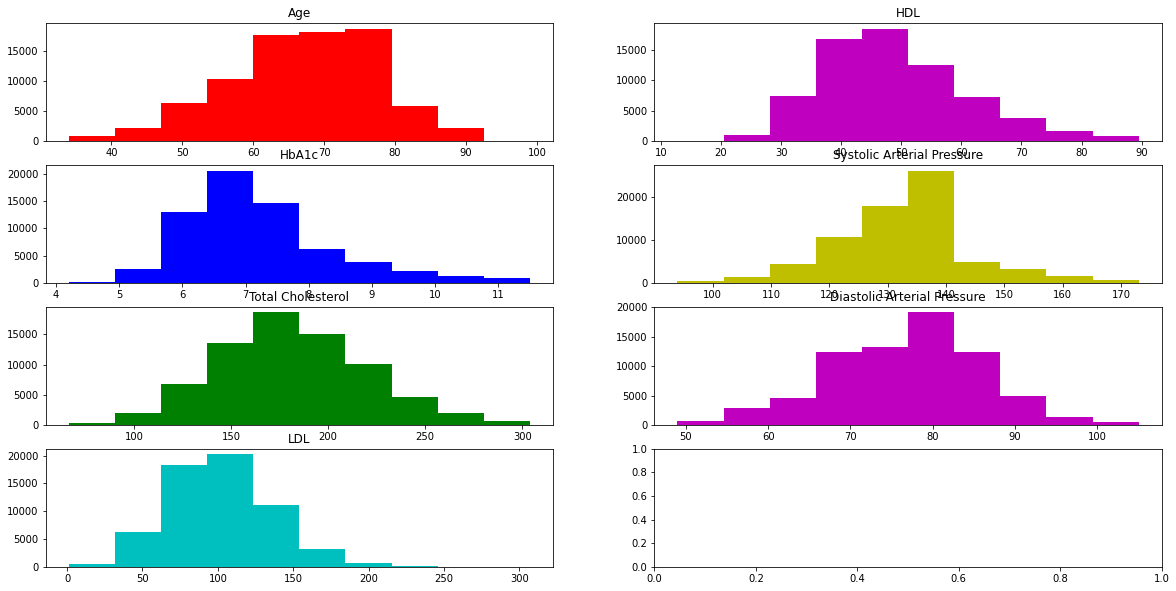

In [61]:
fig, ax = plt.subplots(4, 2, figsize=(20, 10))
ax[0, 0].hist(data["Age"], color =  "r")
ax[1, 0].hist(data["HbA1c"], color =  "b")
ax[2, 0].hist(data["Total Cholesterol"], color =  "g")
ax[3, 0].hist(data["LDL"], color =  "c")
ax[0, 1].hist(data["HDL"], color =  "m")
ax[1, 1].hist(data["Systolic Arterial Pressure"], color =  "y")
ax[2, 1].hist(data["Diastolic Arterial Pressure"], color =  "m")
ax[0, 0].set_title("Age")
ax[1, 0].set_title("HbA1c")
ax[2, 0].set_title("Total Cholesterol")
ax[3, 0].set_title("LDL")
ax[0, 1].set_title("HDL")
ax[1, 1].set_title("Systolic Arterial Pressure")
ax[2, 1].set_title("Diastolic Arterial Pressure")
plt.show()

In [62]:
keys = [str(i) for i in data.columns if i not in ["ID_Image", "ID_Pacient", "Eye", "Retinopathy", "Sex"]]
values_kurtosis = [data[i].kurtosis() for i in data.columns if i not in ["ID_Image", "ID_Pacient", "Eye", "Retinopathy", "Sex"]]
values_skew = [data[i].skew() for i in data.columns if i not in ["ID_Image", "ID_Pacient", "Eye", "Retinopathy", "Sex"]]

In [63]:
kurtosis = dict(zip(keys, values_kurtosis))
kurtosis

{'Age': -0.15721444591392286,
 'Diastolic Arterial Pressure': -0.04531321388242793,
 'HDL': 0.21946223086713879,
 'HbA1c': 1.2024809294854273,
 'LDL': 0.44116805631400213,
 'Systolic Arterial Pressure': 0.853424831030873,
 'Total Cholesterol': -0.04975138444267735}

In [64]:
skew = dict(zip(keys, values_skew))
skew

{'Age': -0.32662175451422115,
 'Diastolic Arterial Pressure': -0.14716664806390267,
 'HDL': 0.6049603132658703,
 'HbA1c': 1.1064858264461201,
 'LDL': 0.4089052263907067,
 'Systolic Arterial Pressure': 0.0709112510889504,
 'Total Cholesterol': 0.25754000417492706}

In [65]:
# Kurtosis is close to 0 so we can assume it's a normal distribution (mesokurtic)
# Skewness is also close to 0 so we can assume they are symmetric.
# The only exception seems to be HbA1c but even so it follows a pretty symetrical normal distribution.

In [66]:
data.describe()

,Age,HbA1c,Total Cholesterol,LDL,HDL,Systolic Arterial Pressure,Diastolic Arterial Pressure
count,82273.000000,65567.00000,73579.000000,60722.00000,70014.000000,71958.000000,71989.000000
mean,66.851849,7.20074,181.933551,102.12037,48.953666,133.079439,76.831346
std,10.553470,1.19866,38.618539,33.67591,12.113631,11.853643,9.014539
min,34.000000,4.20000,66.495200,1.12000,12.757800,94.000000,49.000000
25%,60.000000,6.40000,155.000000,78.09320,40.000000,126.000000,70.000000
50%,68.000000,6.90000,180.000000,100.12940,47.800000,134.000000,77.000000
75%,74.000000,7.70000,207.000000,123.70000,56.057000,140.000000,83.000000
max,99.000000,11.50000,304.000000,307.00000,89.500000,173.000000,105.000000


**5. IMPUTATION OF NAN**

1. SimpleImputer()

In [67]:
def Simple_Imputer(dataset, column, strat):
  imputer = SimpleImputer(strategy = str(strat))
  imputer.fit(pd.DataFrame(dataset[column])) # It has to be a 2-D array (can't be a series)
  dataset[column] = imputer.transform(pd.DataFrame(dataset[column]))
  return dataset[column]

In [68]:
data_imputed_mean = data
[Simple_Imputer(data_imputed_mean, i, "mean") for i in data_imputed_mean.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]

[0        70.0
 1        70.0
 2        70.0
 3        70.0
 4        55.0
          ... 
 82268    82.0
 82269    73.0
 82270    73.0
 82271    65.0
 82272    65.0
 Name: Age, Length: 82273, dtype: float64, 0        6.40000
 1        6.40000
 2        6.40000
 3        6.40000
 4        7.20074
           ...   
 82268    7.90000
 82269    7.70000
 82270    7.70000
 82271    7.50000
 82272    7.50000
 Name: HbA1c, Length: 82273, dtype: float64, 0        148.000000
 1        148.000000
 2        148.000000
 3        148.000000
 4        181.933551
             ...    
 82268    231.000000
 82269    232.000000
 82270    232.000000
 82271    211.000000
 82272    211.000000
 Name: Total Cholesterol, Length: 82273, dtype: float64, 0         76.40000
 1         76.40000
 2         76.40000
 3         76.40000
 4        102.12037
            ...    
 82268    100.00000
 82269    154.00000
 82270    154.00000
 82271    122.00000
 82272    122.00000
 Name: LDL, Length: 82273, dtype: float64, 0

In [69]:
data_imputed_mean.isnull().sum()

ID_Image                       0
Eye                            0
Retinopathy                    0
Age                            0
Sex                            0
HbA1c                          0
Total Cholesterol              0
LDL                            0
HDL                            0
Systolic Arterial Pressure     0
Diastolic Arterial Pressure    0
dtype: int64

In [70]:
data_imputed_median = data
[Simple_Imputer(data_imputed_median, i, "median") for i in data_imputed_median.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]

[0        70.0
 1        70.0
 2        70.0
 3        70.0
 4        55.0
          ... 
 82268    82.0
 82269    73.0
 82270    73.0
 82271    65.0
 82272    65.0
 Name: Age, Length: 82273, dtype: float64, 0        6.40000
 1        6.40000
 2        6.40000
 3        6.40000
 4        7.20074
           ...   
 82268    7.90000
 82269    7.70000
 82270    7.70000
 82271    7.50000
 82272    7.50000
 Name: HbA1c, Length: 82273, dtype: float64, 0        148.000000
 1        148.000000
 2        148.000000
 3        148.000000
 4        181.933551
             ...    
 82268    231.000000
 82269    232.000000
 82270    232.000000
 82271    211.000000
 82272    211.000000
 Name: Total Cholesterol, Length: 82273, dtype: float64, 0         76.40000
 1         76.40000
 2         76.40000
 3         76.40000
 4        102.12037
            ...    
 82268    100.00000
 82269    154.00000
 82270    154.00000
 82271    122.00000
 82272    122.00000
 Name: LDL, Length: 82273, dtype: float64, 0

In [71]:
data_imputed_moda = data
[Simple_Imputer(data_imputed_moda, i, "most_frequent") for i in data_imputed_moda.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]

[0        70.0
 1        70.0
 2        70.0
 3        70.0
 4        55.0
          ... 
 82268    82.0
 82269    73.0
 82270    73.0
 82271    65.0
 82272    65.0
 Name: Age, Length: 82273, dtype: float64, 0        6.40000
 1        6.40000
 2        6.40000
 3        6.40000
 4        7.20074
           ...   
 82268    7.90000
 82269    7.70000
 82270    7.70000
 82271    7.50000
 82272    7.50000
 Name: HbA1c, Length: 82273, dtype: float64, 0        148.000000
 1        148.000000
 2        148.000000
 3        148.000000
 4        181.933551
             ...    
 82268    231.000000
 82269    232.000000
 82270    232.000000
 82271    211.000000
 82272    211.000000
 Name: Total Cholesterol, Length: 82273, dtype: float64, 0         76.40000
 1         76.40000
 2         76.40000
 3         76.40000
 4        102.12037
            ...    
 82268    100.00000
 82269    154.00000
 82270    154.00000
 82271    122.00000
 82272    122.00000
 Name: LDL, Length: 82273, dtype: float64, 0

In [72]:
data_imputed_mean.to_csv("gdrive/MyDrive/ImageClassificationCode/Light_GBM/data_imputed_mean.csv", encoding = 'iso-8859-1')


In [73]:
data_imputed_median.to_csv("gdrive/MyDrive/ImageClassificationCode/Light_GBM/data_imputed_median.csv", encoding = 'iso-8859-1')
data_imputed_moda.to_csv("gdrive/MyDrive/ImageClassificationCode/Light_GBM/data_imputed_moda.csv", encoding = 'iso-8859-1')

2. KNNImputer()

In [74]:
def KNN_Imputer(dataset, column, n):
  imputer = KNNImputer(n_neighbors = n)
  imputer.fit(pd.DataFrame(dataset[column])) # It has to be a 2-D array (can't be a series)
  dataset[column] = imputer.transform(pd.DataFrame(dataset[column]))
  return dataset[column]

In [75]:
data_imputed_KNN_5 = data
[KNN_Imputer(data_imputed_KNN_5, i, 5) for i in data_imputed_KNN_5.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]

[0        70.0
 1        70.0
 2        70.0
 3        70.0
 4        55.0
          ... 
 82268    82.0
 82269    73.0
 82270    73.0
 82271    65.0
 82272    65.0
 Name: Age, Length: 82273, dtype: float64, 0        6.40000
 1        6.40000
 2        6.40000
 3        6.40000
 4        7.20074
           ...   
 82268    7.90000
 82269    7.70000
 82270    7.70000
 82271    7.50000
 82272    7.50000
 Name: HbA1c, Length: 82273, dtype: float64, 0        148.000000
 1        148.000000
 2        148.000000
 3        148.000000
 4        181.933551
             ...    
 82268    231.000000
 82269    232.000000
 82270    232.000000
 82271    211.000000
 82272    211.000000
 Name: Total Cholesterol, Length: 82273, dtype: float64, 0         76.40000
 1         76.40000
 2         76.40000
 3         76.40000
 4        102.12037
            ...    
 82268    100.00000
 82269    154.00000
 82270    154.00000
 82271    122.00000
 82272    122.00000
 Name: LDL, Length: 82273, dtype: float64, 0

In [76]:
data_imputed_KNN_5.to_csv("gdrive/MyDrive/ImageClassificationCode/Light_GBM/data_imputed_KNN_5.csv", encoding = 'iso-8859-1')

3. IterativeImputer()

In [77]:
data_imputed_iterative_num = data[["HbA1c", "Total Cholesterol", "LDL", "HDL", "Systolic Arterial Pressure", "Diastolic Arterial Pressure"]]
data_imputed_iterative_cat = data[["ID_Image", "Eye", "Retinopathy", "Age", "Sex"]]

In [78]:
data_imputed_iterative_num

,HbA1c,Total Cholesterol,LDL,HDL,Systolic Arterial Pressure,Diastolic Arterial Pressure
0,6.40000,148.000000,76.40000,49.000000,115.000000,83.000000
1,6.40000,148.000000,76.40000,49.000000,115.000000,83.000000
2,6.40000,148.000000,76.40000,49.000000,115.000000,83.000000
3,6.40000,148.000000,76.40000,49.000000,115.000000,83.000000
4,7.20074,181.933551,102.12037,48.953666,110.000000,72.000000
...,...,...,...,...,...,...
82268,7.90000,231.000000,100.00000,55.000000,140.000000,70.000000
82269,7.70000,232.000000,154.00000,60.000000,139.000000,67.000000
82270,7.70000,232.000000,154.00000,60.000000,139.000000,67.000000
82271,7.50000,211.000000,122.00000,58.000000,133.079439,76.831346


In [79]:
data_imputed_iterative_cat

,ID_Image,Eye,Retinopathy,Age,Sex
0,3gfse4v66swpi5v1_610213783582_od_nasal_2106071...,D,1,70.0,H
1,3gfse4v66swpi57n_610213783582_od_central_21060...,D,1,70.0,H
2,3gfse4v66swpi84f_610213783582_os_central_21060...,E,1,70.0,H
3,3gfse4v66swpi8n0_610213783582_os_nasal_2106071...,E,1,70.0,H
4,3gfse4v66um1ynfa_610214136696_od_central_21072...,D,1,55.0,H
...,...,...,...,...,...
82268,0ngpp8436fadf4sl_68441550467_od_central_201005...,D,1,82.0,D
82269,0ngpp8436am0k3qd_68441514549_os_central_200303...,E,1,73.0,H
82270,0ngpp8436am0k2o6_68441514549_od_central_200303...,D,1,73.0,H
82271,0ngpp8436letmszd_68441570330_od_central_201130...,D,1,65.0,H


In [80]:
imputer = IterativeImputer()
imputer.fit(pd.DataFrame(data_imputed_iterative_num))
data_imputed_iterative_num = imputer.transform(data_imputed_iterative_num)

In [81]:
data_imputed_iterative_num = pd.DataFrame(data_imputed_iterative_num, columns = ["HbA1c", "Total Cholesterol", "LDL", "HDL", "Systolic Arterial Pressure", "Diastolic Arterial Pressure"])

In [82]:
data_imputed_iterative_num

,HbA1c,Total Cholesterol,LDL,HDL,Systolic Arterial Pressure,Diastolic Arterial Pressure
0,6.40000,148.000000,76.40000,49.000000,115.000000,83.000000
1,6.40000,148.000000,76.40000,49.000000,115.000000,83.000000
2,6.40000,148.000000,76.40000,49.000000,115.000000,83.000000
3,6.40000,148.000000,76.40000,49.000000,115.000000,83.000000
4,7.20074,181.933551,102.12037,48.953666,110.000000,72.000000
...,...,...,...,...,...,...
82268,7.90000,231.000000,100.00000,55.000000,140.000000,70.000000
82269,7.70000,232.000000,154.00000,60.000000,139.000000,67.000000
82270,7.70000,232.000000,154.00000,60.000000,139.000000,67.000000
82271,7.50000,211.000000,122.00000,58.000000,133.079439,76.831346


In [83]:
data_imputed_iterative = pd.concat([data_imputed_iterative_cat, data_imputed_iterative_num], axis = 1, ignore_index = False)

In [84]:
data_imputed_iterative

,ID_Image,Eye,Retinopathy,Age,Sex,HbA1c,Total Cholesterol,LDL,HDL,Systolic Arterial Pressure,Diastolic Arterial Pressure
0,3gfse4v66swpi5v1_610213783582_od_nasal_2106071...,D,1,70.0,H,6.40000,148.000000,76.40000,49.000000,115.000000,83.000000
1,3gfse4v66swpi57n_610213783582_od_central_21060...,D,1,70.0,H,6.40000,148.000000,76.40000,49.000000,115.000000,83.000000
2,3gfse4v66swpi84f_610213783582_os_central_21060...,E,1,70.0,H,6.40000,148.000000,76.40000,49.000000,115.000000,83.000000
3,3gfse4v66swpi8n0_610213783582_os_nasal_2106071...,E,1,70.0,H,6.40000,148.000000,76.40000,49.000000,115.000000,83.000000
4,3gfse4v66um1ynfa_610214136696_od_central_21072...,D,1,55.0,H,7.20074,181.933551,102.12037,48.953666,110.000000,72.000000
...,...,...,...,...,...,...,...,...,...,...,...
82268,0ngpp8436fadf4sl_68441550467_od_central_201005...,D,1,82.0,D,7.90000,231.000000,100.00000,55.000000,140.000000,70.000000
82269,0ngpp8436am0k3qd_68441514549_os_central_200303...,E,1,73.0,H,7.70000,232.000000,154.00000,60.000000,139.000000,67.000000
82270,0ngpp8436am0k2o6_68441514549_od_central_200303...,D,1,73.0,H,7.70000,232.000000,154.00000,60.000000,139.000000,67.000000
82271,0ngpp8436letmszd_68441570330_od_central_201130...,D,1,65.0,H,7.50000,211.000000,122.00000,58.000000,133.079439,76.831346


In [85]:
data_imputed_iterative.to_csv("gdrive/MyDrive/ImageClassificationCode/Light_GBM/data_imputed_iterative.csv", encoding = 'iso-8859-1')

**6. CHECKING DISTRIBUTIONS**

In [86]:
keys = [str(i) for i in data_imputed_mean.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]
values_kurtosis = [data_imputed_mean[i].kurtosis() for i in data_imputed_mean.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]
values_skew = [data_imputed_mean[i].skew() for i in data_imputed_mean.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]

kurtosis = dict(zip(keys, values_kurtosis))
skew = dict(zip(keys, values_skew))

In [87]:
kurtosis

{'Age': -0.15721444591392286,
 'Diastolic Arterial Pressure': 0.3767832056614018,
 'HDL': 0.7831707155102796,
 'HbA1c': 2.2732240353696946,
 'LDL': 1.6624726566506727,
 'Systolic Arterial Pressure': 1.4057989067956562,
 'Total Cholesterol': 0.2988498872761318}

In [88]:
skew

{'Age': -0.32662175451422115,
 'Diastolic Arterial Pressure': -0.15732721815151138,
 'HDL': 0.6557853647011423,
 'HbA1c': 1.239452386336617,
 'LDL': 0.47596551089114897,
 'Systolic Arterial Pressure': 0.07582337952336954,
 'Total Cholesterol': 0.2723300018922411}

<function matplotlib.pyplot.show>

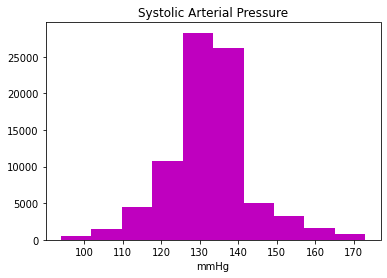

In [99]:
plt.hist(data_imputed_mean["Systolic Arterial Pressure"], color =  "m")
plt.title("Systolic Arterial Pressure")
plt.xlabel("mmHg")
plt.show

In [100]:
data_imputed_mean.corr()  

,Age,HbA1c,Total Cholesterol,LDL,HDL,Systolic Arterial Pressure,Diastolic Arterial Pressure
Age,1.000000,-0.109558,-0.126778,-0.139456,0.125232,0.104900,-0.282901
HbA1c,-0.109558,1.000000,0.061276,0.035964,-0.128193,0.038996,0.056334
Total Cholesterol,-0.126778,0.061276,1.000000,0.794206,0.311607,0.018343,0.112304
LDL,-0.139456,0.035964,0.794206,1.000000,0.173599,0.008973,0.107975
HDL,0.125232,-0.128193,0.311607,0.173599,1.000000,-0.008478,-0.042216
Systolic Arterial Pressure,0.104900,0.038996,0.018343,0.008973,-0.008478,1.000000,0.340460
Diastolic Arterial Pressure,-0.282901,0.056334,0.112304,0.107975,-0.042216,0.340460,1.000000


In [89]:
keys = [str(i) for i in data_imputed_KNN_5.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]
values_kurtosis = [data_imputed_KNN_5[i].kurtosis() for i in data_imputed_KNN_5.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]
values_skew = [data_imputed_KNN_5[i].skew() for i in data_imputed_KNN_5.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]

kurtosis = dict(zip(keys, values_kurtosis))
skew = dict(zip(keys, values_skew))

In [90]:
kurtosis

{'Age': -0.15721444591392286,
 'Diastolic Arterial Pressure': 0.3767832056614018,
 'HDL': 0.7831707155102796,
 'HbA1c': 2.2732240353696946,
 'LDL': 1.6624726566506727,
 'Systolic Arterial Pressure': 1.4057989067956562,
 'Total Cholesterol': 0.2988498872761318}

In [91]:
skew

{'Age': -0.32662175451422115,
 'Diastolic Arterial Pressure': -0.15732721815151138,
 'HDL': 0.6557853647011423,
 'HbA1c': 1.239452386336617,
 'LDL': 0.47596551089114897,
 'Systolic Arterial Pressure': 0.07582337952336954,
 'Total Cholesterol': 0.2723300018922411}

In [92]:
keys = [str(i) for i in data_imputed_iterative.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]
values_kurtosis = [data_imputed_iterative[i].kurtosis() for i in data_imputed_iterative.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]
values_skew = [data_imputed_iterative[i].skew() for i in data_imputed_iterative.columns if i not in ["ID_Image", "Eye", "Retinopathy", "Sex"]]

kurtosis = dict(zip(keys, values_kurtosis))
skew = dict(zip(keys, values_skew))

In [93]:
kurtosis

{'Age': -0.15721444591392286,
 'Diastolic Arterial Pressure': 0.3767832056614018,
 'HDL': 0.7831707155102796,
 'HbA1c': 2.2732240353696946,
 'LDL': 1.6624726566506727,
 'Systolic Arterial Pressure': 1.4057989067956562,
 'Total Cholesterol': 0.2988498872761318}

In [94]:
skew

{'Age': -0.32662175451422115,
 'Diastolic Arterial Pressure': -0.15732721815151138,
 'HDL': 0.6557853647011423,
 'HbA1c': 1.239452386336617,
 'LDL': 0.47596551089114897,
 'Systolic Arterial Pressure': 0.07582337952336954,
 'Total Cholesterol': 0.2723300018922411}